<br>

## Weekend Buddy App 


# Travel Planning Helper
### Idea/task
+ We are interested in building a travel planning companion app that provides the user with a variety of helpful tools, such as tracking weather, flight ticket price prediction, and possibly budgeting
+ Beyond the resources we would like to connect the apis together and make it open in a new window
+ The window would have the information well organized and include resources based on the travel destination 

### APIs, libraries, and resources
+ We have compiled some possible apis related to travel including a currency converter, a flight tracking api, and a hotel api. Some additional resources we are referencing are at https://rapidapi.com/blog/best-travel-apis-guide/
+ We have one large dataset from Kaggle that holds flight data from 2018 across 12 airlines in the US. The data is sourced from the US Bureau of Transportation statistics. The dataset has nearly 10 million entries and we've been cleaning, processing, and modeling predictions off of the data. It includes information about airport departure/arrival destinations,  # miles, airline, and price ticket, etc. Down below we show our progress in modeling airplane price ticket predictions. (https://www.kaggle.com/datasets/zernach/2018-airplane-flights/metadata)
+ Libraries and tools we have used: tkinter/simpledialog, requests, numpy, pandas, sklearn

### Current explorations (summary)
+ Our current progress involves different concepts such as APIs and requests, data visualization, modeling with random forests, and additional explorations beyond class resources with creating user interfaces and designing a multi-functional 'app'.
+ We've cleaned and process a massive dataset and have predicted a target feature with about ~0.3 R^2 in our regression. We made use of sklearn.pipeline and RandomForestRegressor.



Demo video can be found at:
https://drive.google.com/file/d/1cKW2VtbrtktNMf5sq-pu8ptkwN8sguoK/view?usp=sharing

# Project Code 


### tkinter, dialog boxes, and weather API
+ We've used the tkinter library to create a simple pop-up and dialog box as a mock-up for what a travel app could look like. The dialog box accepts input for a city and will return a query for a weather report in the upcoming three days based on the weather API.
+ We've also used the tkinter library to create a multi pop-up and dialog box series which accepts input for origin/destination airports, flight miles, and airline and will return a query for a predicted flight price based on our random forest model using flight data from 2018.

In [18]:
import tkinter as tk
from tkinter import simpledialog
import requests

# import everything from tkinter module
from tkinter import *
  
# import messagebox from tkinter module
import tkinter.messagebox

# create a tkinter root window
root = tkinter.Tk()
  
# root window title and dimension
root.title("Welcome To Your Weekend Travel Helper!")
root.geometry('400x200')
  
# Create a messagebox showinfo
  
def weatherinfo():
    # print(42)
    ROOT = tk.Tk()
    ROOT.withdraw()

    # the input dialog
    USER_INP = simpledialog.askstring(title="Weekend Travel Helper - Weather",
                                    prompt="Where would you like to go this weekend?")

    location=USER_INP
    days = "4"
    url = "http://api.weatherapi.com/v1/forecast.json?key=419ef19aa81a42b3b74231819221604&q=" + location + "&days=" + days + "&aqi=no&alerts=no"
    result = requests.get(url)

    # In this case, we know the result is a JSON file, and we can obtain it:
    json_contents = result.json()

    # Python program to create a table
    class Table:
        
        def __init__(self,root):
            
            # code for creating table
            for i in range(total_rows):
                for j in range(total_columns):
                    
                    self.e = Entry(root, width=45, fg='White',
                                font=('Arial',14,'bold'))
                    
                    self.e.grid(row=i, column=j)
                    self.e.insert(END, lst[i][j])
    # take the data
    lst = [("Today", "Weather Condition: " + json_contents["current"]["condition"]["text"], str(json_contents["current"]["temp_f"]) + " Degrees F", "Humidity is " + str(json_contents["current"]["humidity"]) + "%"),
        ("Future Dates:","Forecast Weather Conditions:",'Sunrise:', 'Sunset:'),
        (json_contents["forecast"]["forecastday"][0]["date"], json_contents["forecast"]["forecastday"][0]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][0]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        (json_contents["forecast"]["forecastday"][1]["date"], json_contents["forecast"]["forecastday"][1]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][1]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        (json_contents["forecast"]["forecastday"][2]["date"], json_contents["forecast"]["forecastday"][2]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][2]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        ]
    
    # find total number of rows and
    # columns in list
    total_rows = len(lst)
    total_columns = len(lst[0])
    
    # create root window
    root = Tk()
    t = Table(root)
    root.mainloop()
  
def flight():
    ROOT = tk.Tk()
    ROOT.withdraw()

    # the input dialog
    USER_INP1 = simpledialog.askstring(title="Flight Info Predictor",
                                    prompt="Where are you flying from?")

    origin=USER_INP1

    USER_INP2 = simpledialog.askstring(title="Flight Info Predictor",
                                    prompt="Where are you flying to?")

    dest=USER_INP2

    USER_INP3 = simpledialog.askstring(title="Flight Info Predictor",
                                    prompt="How many miles would you like to fly?")

    miles=USER_INP3

    USER_INP4 = simpledialog.askstring(title="Flight Info Predictor",
                                    prompt="What airline would you like to fly?")

    airline=USER_INP4

    price = predict(origin, dest, miles, airline)

    tkinter.messagebox.showinfo("Flight Price Predictor", price)

    # # american
    # predict(23,91,2402,12) # from philly to LAX on American Airlines
    # predict(41,64,403,12) # chicago ohare ORD to MCI kansas American

    # # frontier
    # predict(23,91,2402,4) # from philly to LAX on Frontier Airlines
    # predict(41,64,403,4) # chicago ohare ORD to MCI kansas Frontier

# Create a Buttons  
Button1 = Button(root, text="Generate Flight Report", command=flight, pady=10)
Button2 = Button(root, text="Generate Weather Report", command=weatherinfo, pady=10)
  
# Set the position of buttons
Button1.pack(side=LEFT)
Button2.pack(side=RIGHT)
  
root.mainloop()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Dataset and using random forest regression to model flight ticket prices

In [2]:
# our libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)
import seaborn as sns   # yay for Seaborn!


In [3]:
# get original 2018 flights data from US Bureau of Transporation statistics
filename = '2018_Flights.csv'
flights_orig = pd.read_csv(filename)   
print(f"{filename} : file read into a pandas dataframe.")
flights_orig

flights_orig.info()

# clean this up a bit by removing unwanted columns
COLUMN = 1; ROW = 0
flights_cleaned1 = flights_orig.drop(["ItinID", "MktCoupons", "MktID", "Quarter","NumTicketsOrdered","ContiguousUSA"], axis=COLUMN )
df_flights = flights_cleaned1.iloc[: , 1:]

df_flights.info()


2018_Flights.csv : file read into a pandas dataframe.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   ItinID             int64  
 2   MktID              int64  
 3   MktCoupons         int64  
 4   Quarter            int64  
 5   Origin             object 
 6   OriginWac          int64  
 7   Dest               object 
 8   DestWac            int64  
 9   Miles              float64
 10  ContiguousUSA      int64  
 11  NumTicketsOrdered  float64
 12  AirlineCompany     object 
 13  PricePerTicket     float64
dtypes: float64(3), int64(8), object(3)
memory usage: 1018.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Origin          object 
 1   OriginWac       int64  
 2   Dest            object 

In [4]:
airline_companies = sorted(list(df_flights['AirlineCompany'].unique()))
origin_airport = sorted(list(df_flights['Origin'].unique()))
destination_airport = sorted(list(df_flights['Dest'].unique()))

len(origin_airport)
len(destination_airport)

260

In [5]:
df_flights['AirlineCompany'].describe()
unique_airlines = set(df_flights['AirlineCompany'])

# for airline in unique_airlines:
#     print(airline)

AIRLINE = ['WN','DL','AA','UA','B6','AS','NK','F9','HA','G4','SY','VX']   # get airline codes

AIRLINE_NAMES = {'WN':'Southwest Airlines Co.', 'DL':'Delta Air Lines Inc.',\
    'AA':'American Airlines Inc.', 'UA':'United Air Lines Inc.',\
        'B6':'JetBlue Airways','AS':'Alaska Airlines Inc.',\
            'NK':'Spirit Air Lines','F9':'Frontier Airlines Inc.',\
                'HA':'Hawaiian Airlines Inc.','G4':'Allegiant Air',\
                    'SY':'Sun Country Airlines d/b/a MN Airlines','VX':'Virgin America'} 


# 2-letter codes are from the Department of Transportation's Bureau of Transportation Statistics --
# WN -- Southwest Airlines Co.
# DL -- Delta Air Lines Inc.
# AA -- American Airlines Inc.
# UA -- United Air Lines Inc.
# B6 -- JetBlue Airways
# AS -- Alaska Airlines Inc.
# NK -- Spirit Air Lines
# F9 -- Frontier Airlines Inc.
# HA -- Hawaiian Airlines Inc.
# G4 -- Allegiant Air
# SY -- Sun Country Airlines d/b/a MN Airlines
# VX -- Virgin America

df_flights['AirlineIndex'] = df_flights['AirlineCompany'].rank(method='dense', ascending=False).astype(int)

# We'll construct the new filename:
old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_flights.to_csv(cleaned_filename, index_label=False)  
df_flights

cleaned_filename is 2018_Flights_cleaned.csv


,Origin,OriginWac,Dest,DestWac,Miles,AirlineCompany,PricePerTicket,AirlineIndex
0,PHL,23,LAX,91,2402.0,AA,672.87,12
1,PHL,23,LAX,91,2402.0,AA,367.68,12
2,PHL,23,LAX,91,2402.0,AA,417.94,12
3,PHL,23,LAX,91,2402.0,AA,247.10,12
4,PHL,23,LAX,91,2402.0,AA,276.35,12
...,...,...,...,...,...,...,...,...
9534412,STL,64,AUS,74,721.0,WN,310.10,1
9534413,BNA,54,MCI,64,491.0,WN,106.17,1
9534414,BOS,13,LIT,71,1260.0,WN,161.19,1
9534415,BOS,13,LIT,71,1260.0,WN,170.87,1


In [6]:
df = pd.read_csv("2018_Flights_cleaned.csv")
df = df.drop(["Origin", "Dest", "AirlineCompany"], axis=1) # COLUMN
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9534417 entries, 0 to 9534416
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   OriginWac       int64  
 1   DestWac         int64  
 2   Miles           float64
 3   PricePerTicket  float64
 4   AirlineIndex    int64  
dtypes: float64(2), int64(3)
memory usage: 436.5 MB


,OriginWac,DestWac,Miles,PricePerTicket,AirlineIndex
0,23,91,2402.0,672.87,12
1,23,91,2402.0,367.68,12
2,23,91,2402.0,417.94,12
3,23,91,2402.0,247.10,12
4,23,91,2402.0,276.35,12
...,...,...,...,...,...
9534412,64,74,721.0,310.10,1
9534413,54,64,491.0,106.17,1
9534414,13,71,1260.0,161.19,1
9534415,13,71,1260.0,170.87,1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PricePerTicket', ylabel='Density'>

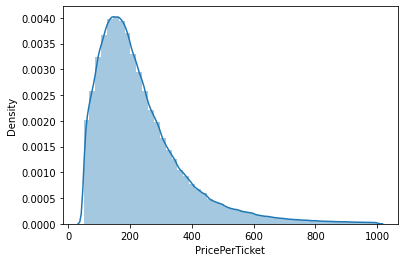

In [7]:
y = df['PricePerTicket']
sns.distplot(y)

In [ ]:
df_flights['PricePerTicket'].describe()

# The mean flight ticket price in 2018 is about $232! 

count    9.534417e+06
mean     2.324497e+02
std      1.433412e+02
min      5.000000e+01
25%      1.339100e+02
50%      1.971900e+02
75%      2.900000e+02
max      1.000000e+03
Name: PricePerTicket, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

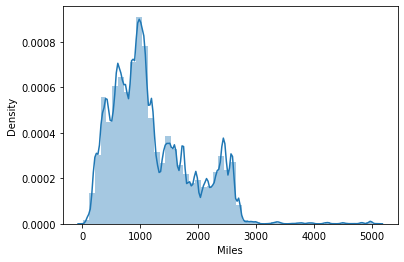

In [ ]:
y2 = df_flights['Miles']
sns.distplot(y2)

In [ ]:
df

,OriginWac,DestWac,Miles,PricePerTicket,AirlineIndex
0,23,91,2402.0,672.87,12
1,23,91,2402.0,367.68,12
2,23,91,2402.0,417.94,12
3,23,91,2402.0,247.10,12
4,23,91,2402.0,276.35,12
...,...,...,...,...,...
9534412,64,74,721.0,310.10,1
9534413,54,64,491.0,106.17,1
9534414,13,71,1260.0,161.19,1
9534415,13,71,1260.0,170.87,1


In [8]:
airport_code_dict = pd.Series(df_flights["OriginWac"].values,index=df_flights["Origin"]).to_dict()

airline_dict = {'WN':1, 'DL':9, 'AA':12, 'UA':3, 'B6':10,'AS':11,'NK':5,'F9':8,'HA':6,'G4':7,'SY':4,'VX':2} 
airport_code_dict

{'PHL': 23,
 'LAX': 91,
 'SAN': 91,
 'SFO': 91,
 'AUS': 74,
 'BOS': 13,
 'MIA': 33,
 'ORD': 41,
 'LGA': 22,
 'CLT': 36,
 'TPA': 33,
 'DFW': 74,
 'LAS': 85,
 'MCI': 64,
 'MCO': 33,
 'FLL': 33,
 'MSY': 72,
 'PBI': 33,
 'PHX': 81,
 'RSW': 33,
 'MEM': 54,
 'MHT': 14,
 'SJU': 3,
 'SLC': 87,
 'MSP': 63,
 'SAT': 74,
 'CLE': 44,
 'DEN': 82,
 'JAC': 88,
 'SEA': 93,
 'RDU': 36,
 'SMF': 91,
 'DTW': 43,
 'PIT': 23,
 'PVD': 15,
 'ATL': 34,
 'BNA': 54,
 'DCA': 38,
 'STL': 64,
 'ABQ': 86,
 'BOI': 83,
 'JFK': 22,
 'KOA': 2,
 'BWI': 35,
 'EWR': 21,
 'JAX': 33,
 'CMH': 44,
 'OMA': 65,
 'PDX': 92,
 'COS': 82,
 'DSM': 61,
 'GEG': 93,
 'HDN': 82,
 'IND': 42,
 'MKE': 45,
 'MTJ': 82,
 'FAT': 91,
 'HNL': 2,
 'LIH': 2,
 'IAH': 74,
 'SJC': 91,
 'SNA': 91,
 'OGG': 2,
 'RNO': 85,
 'OAK': 91,
 'ONT': 91,
 'PSP': 91,
 'RIC': 38,
 'SAV': 34,
 'PNS': 33,
 'SDF': 52,
 'PWM': 12,
 'BDL': 11,
 'TUL': 73,
 'ORF': 38,
 'VPS': 33,
 'TUS': 81,
 'SBA': 91,
 'ILM': 36,
 'IAD': 38,
 'CVG': 52,
 'GSP': 37,
 'STT': 4,
 'STX': 4,

### Predictive modeling
We will use origin airport, destination airport, # miles, and airline company as predictive features for our target feature of price per ticket.

In [9]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df.to_numpy()   
A = A.astype('float64')  

# num rows and columns
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")
A



The dataset has 9534417 rows and 5 cols


array([[2.3000e+01, 9.1000e+01, 2.4020e+03, 6.7287e+02, 1.2000e+01],
       [2.3000e+01, 9.1000e+01, 2.4020e+03, 3.6768e+02, 1.2000e+01],
       [2.3000e+01, 9.1000e+01, 2.4020e+03, 4.1794e+02, 1.2000e+01],
       ...,
       [1.3000e+01, 7.1000e+01, 1.2600e+03, 1.6119e+02, 1.0000e+00],
       [1.3000e+01, 7.1000e+01, 1.2600e+03, 1.7087e+02, 1.0000e+00],
       [1.3000e+01, 7.1000e+01, 1.2600e+03, 3.7902e+02, 1.0000e+00]])

In [10]:
print("+++ Start of data definitions +++\n")

X_all = np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # X (features) ... is all rows, columns 0, 1, 3
y_all = A[:,3]    # y (labels) ... is all rows, column 2 only
y_all=y_all.astype('int') 

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")


+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [672 367 417 ... 161 170 379]
X_all (just the features, first few rows) are 
 [[  23.   91. 2402.   12.]
 [  23.   91. 2402.   12.]
 [  23.   91. 2402.   12.]
 [  23.   91. 2402.   12.]
 [  23.   91. 2402.   12.]]


In [11]:
#
# we can scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_all}")
print(f"The corresponding data rows are \n {X_all[0:5]}")

The scrambled labels/species are 
 [186 132 125 ... 309 181 201]
The corresponding data rows are 
 [[1.300e+01 3.600e+01 7.280e+02 1.200e+01]
 [3.300e+01 2.200e+01 1.334e+03 7.000e+00]
 [1.300e+01 3.400e+01 9.460e+02 1.000e+01]
 [4.100e+01 9.300e+01 1.721e+03 1.200e+01]
 [1.000e+00 1.000e+00 5.390e+02 1.100e+01]]


In [12]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 7627533 rows;  testing with 1906884 rows

Held-out data... (testing data: 1906884)
y_test: [157 260  86 ... 343 141 203]

X_test (few rows): [[4.300e+01 6.300e+01 5.280e+02 9.000e+00]
 [2.100e+01 3.300e+01 1.065e+03 1.000e+01]
 [4.400e+01 4.100e+01 2.830e+02 1.000e+00]
 [1.100e+01 4.100e+01 7.830e+02 3.000e+00]
 [3.300e+01 6.400e+01 6.340e+02 1.000e+00]]

Data used for modeling... (training data: 7627533)
y_train: [153 224 317 ... 143 222 131]

X_train (few rows): [[  21.   13.  200.   10.]
 [  74.   82.  641.    3.]
 [  91.   35. 2457.    3.]
 [  41.   91. 1846.    3.]
 [  33.   22. 1101.    8.]]


In [13]:
features = df.columns.drop(['PricePerTicket'])
features

Index(['OriginWac', 'DestWac', 'Miles', 'AirlineIndex'], dtype='object')

In [14]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=20))])

In [15]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(X_test)
print('RandomForest R^2 Score = ', r2_score(y_test, y_pred))

# Get feature importances
model = pipeline.named_steps['randomforestregressor']

RandomForest R^2 Score =  0.29307158180896187


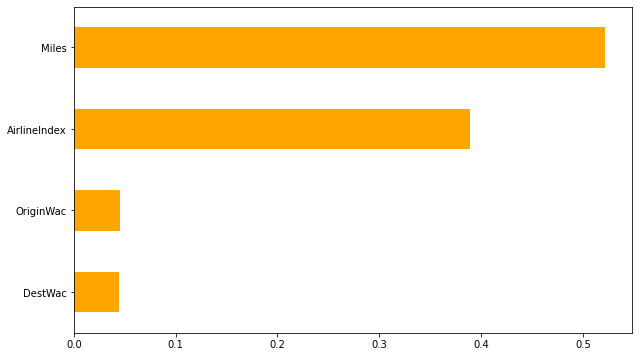

In [16]:
# Get feature importances
model = pipeline.named_steps['randomforestregressor']
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.set()
#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='orange');

In [17]:
def predict(OriginWac, DestWac, Miles, AirlineCompany):
    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[OriginWac, DestWac, Miles, AirlineCompany]], 
        columns=['OriginWac', 'DestWac', 'Miles', 'AirlineCompany']
    )

    # Get the model's prediction
    pred = model.predict(df)[0]

    # Get series with shap values, feature names, & feature values
    feature_names = df.columns
    feature_values = df.values[0]

    # Print results
    result = f'${pred:,.0f} estimated price for a plane ticket. \n\n'
    return(result)

# american
predict(23,91,2402,12) # from philly to LAX on American Airlines
predict(41,64,403,12) # chicago ohare ORD to MCI kansas American

# frontier
predict(23,91,2402,4) # from philly to LAX on Frontier Airlines
predict(41,64,403,4) # chicago ohare ORD to MCI kansas Frontier

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


'$135 estimated price for a plane ticket. \n\n'

# User Input with tkinter (Experimental)

In [ ]:
import tkinter as tk
from tkinter import simpledialog
import requests

# import everything from tkinter module
from tkinter import *
  
# import messagebox from tkinter module
import tkinter.messagebox

# create a tkinter root window
root = tkinter.Tk()
  
# root window title and dimension
root.title("Welcome To Your Weekend Travel Helper!")
root.geometry('400x200')
  
# Create a messagebox showinfo
  
def weatherinfo():
    # print(42)
    ROOT = tk.Tk()
    ROOT.withdraw()

    # the input dialog
    USER_INP = simpledialog.askstring(title="Test",
                                    prompt="Where would you like to go this weekend?")

    location=USER_INP
    days = "4"
    url = "http://api.weatherapi.com/v1/forecast.json?key=419ef19aa81a42b3b74231819221604&q=" + location + "&days=" + days + "&aqi=no&alerts=no"
    result = requests.get(url)

    # In this case, we know the result is a JSON file, and we can obtain it:
    json_contents = result.json()

    # Python program to create a table
    class Table:
        
        def __init__(self,root):
            
            # code for creating table
            for i in range(total_rows):
                for j in range(total_columns):
                    
                    self.e = Entry(root, width=50, fg='Black',
                                font=('Courier',12,'bold'))
                    
                    self.e.grid(row=i, column=j)
                    self.e.insert(END, lst[i][j])
    # take the data
    lst = [("Today", "Weather Condition: " + json_contents["current"]["condition"]["text"], str(json_contents["current"]["temp_f"]) + " Degrees F", "Humidity is: " + str(json_contents["current"]["humidity"]) + "%"),
        ("Future Dates:","Forecast Weather Conditions:",'Sunrise:', 'Sunset:'),
        (json_contents["forecast"]["forecastday"][0]["date"], json_contents["forecast"]["forecastday"][0]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][0]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        (json_contents["forecast"]["forecastday"][1]["date"], json_contents["forecast"]["forecastday"][1]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][1]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        (json_contents["forecast"]["forecastday"][2]["date"], json_contents["forecast"]["forecastday"][2]["day"]["condition"]["text"],json_contents["forecast"]["forecastday"][2]["astro"]["sunrise"],json_contents["forecast"]["forecastday"][0]["astro"]["sunset"]),
        ]
    
    # find total number of rows and
    # columns in list
    total_rows = len(lst)
    total_columns = len(lst[0])
    
    # create root window
    root = Tk()
    t = Table(root)
    root.mainloop()